In [ ]:
# %pip install --upgrade plotly

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data


In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        

# Preliminary Data Exploration 🔎


In [ ]:
data.shape 

(506, 14)

In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [ ]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


In [ ]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


In [ ]:
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Visualise the Features



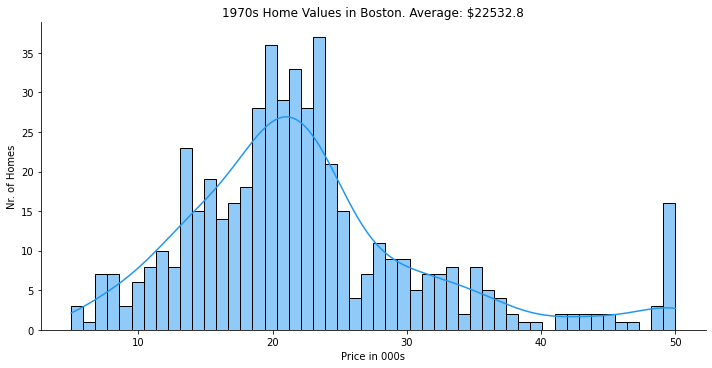

In [ ]:
sns.displot(data['PRICE'], bins=50, aspect=2,kde=True, color='#2196f3')
plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')
plt.show()

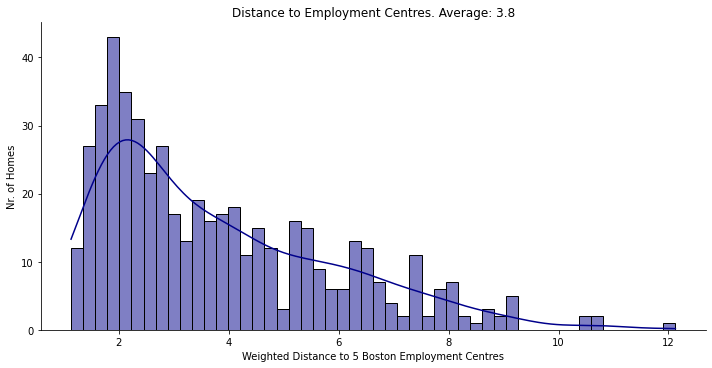

In [ ]:
sns.displot(data.DIS, bins=50, aspect=2,kde=True, color='darkblue')
plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')
plt.show()

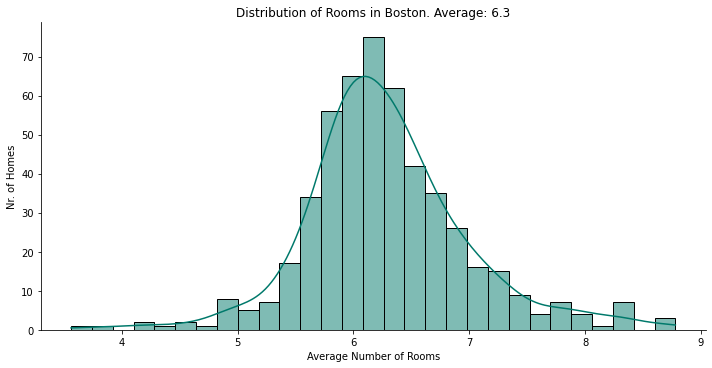

In [ ]:
sns.displot(data.RM, aspect=2,kde=True, color='#00796b')
plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')
plt.show()

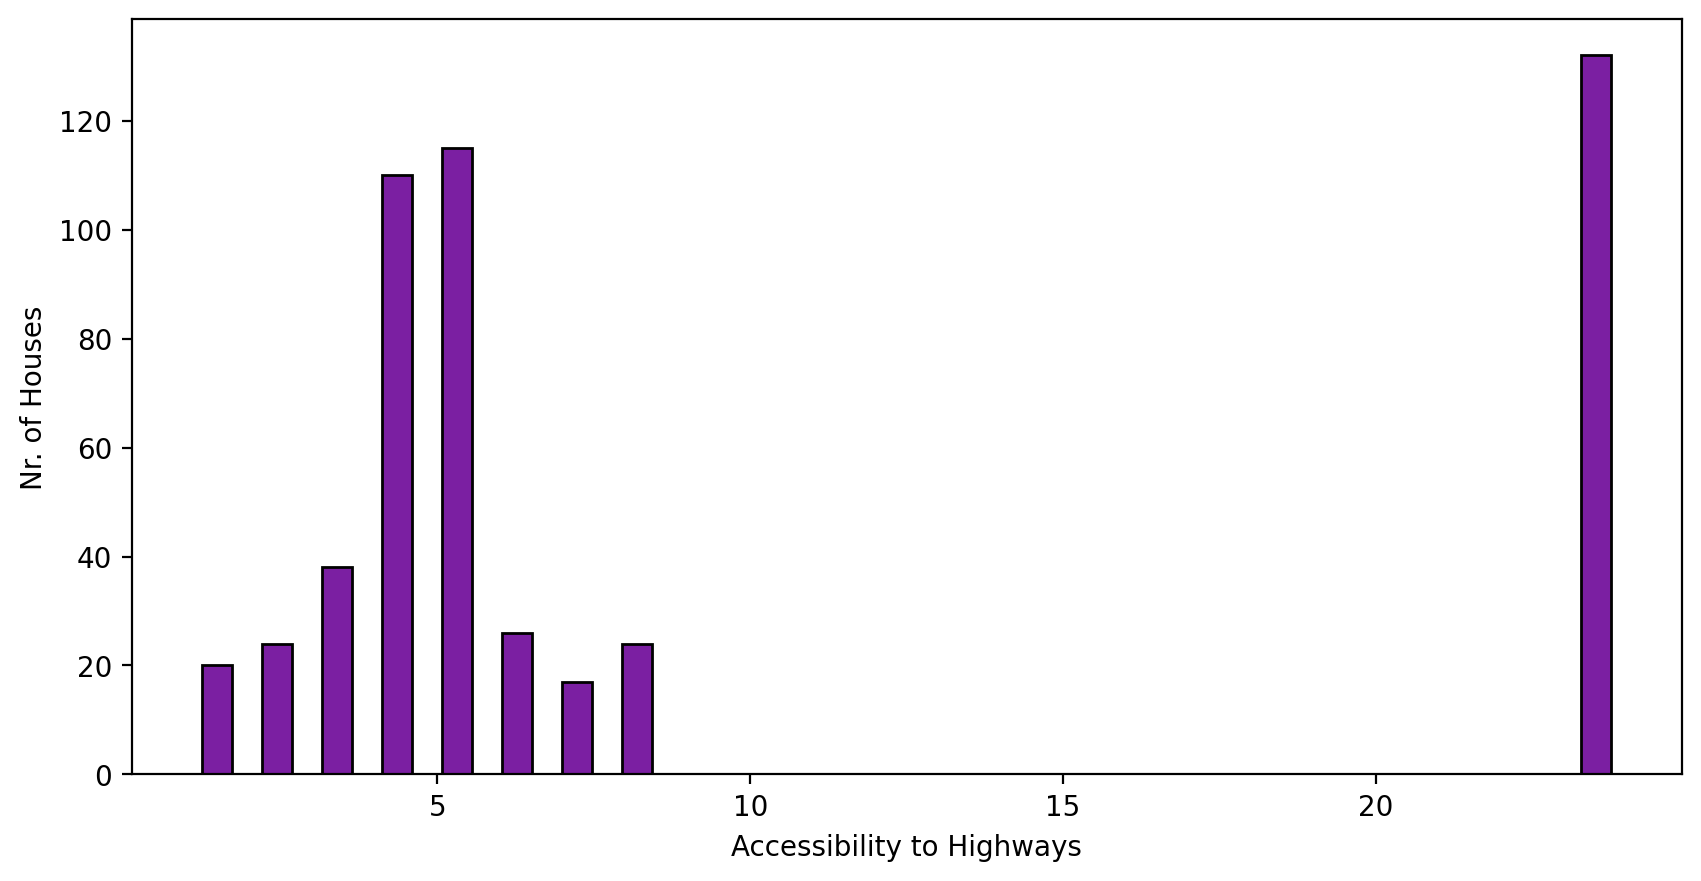

In [ ]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(data['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

# Split Training & Test Dataset



In [ ]:
target = data['PRICE']
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [ ]:
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression


In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [ ]:
premium = regr_coef.loc['RM'].values[0] * 1000  
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


In [ ]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

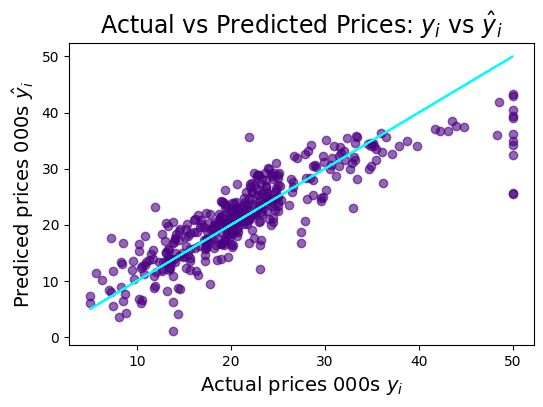

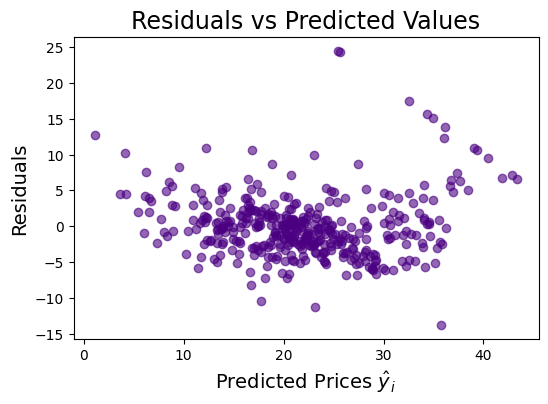

In [ ]:
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

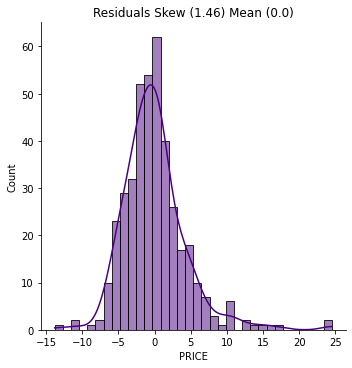

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)
sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

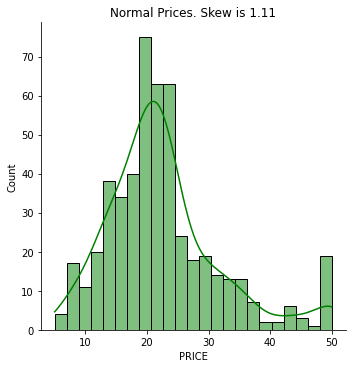

In [ ]:
tgt_skew = data['PRICE'].skew()
sns.displot(data['PRICE'], kde='kde', color='green')
plt.title(f'Normal Prices. Skew is {tgt_skew:.3}')
plt.show()

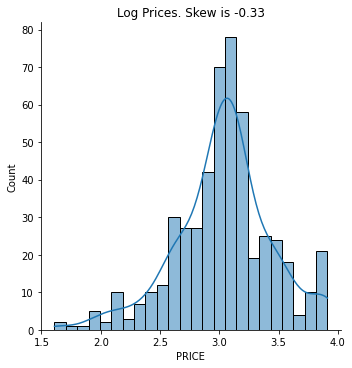

In [ ]:
y_log = np.log(data['PRICE'])
sns.displot(y_log, kde=True)
plt.title(f'Log Prices. Skew is {y_log.skew():.3}')
plt.show()

## Regression using Log Prices



In [ ]:
new_target = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)
X_train, X_test, log_y_train, log_y_test = train_test_split(features, new_target, test_size=0.2, random_state=10)
log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
log_rsquared = log_regr.score(X_train, log_y_train)
log_predictions = log_regr.predict(X_train)
log_residuals = (log_y_train - log_predictions)
print(f'Training data r-squared: {log_rsquared:.2}')

Training data r-squared: 0.79


In [ ]:
df_coef = pd.DataFrame(data=log_regr.coef_, index=X_train.columns, columns=['coef'])
df_coef

,coef
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


# Predict a Property's Value using the Regression Coefficients


In [ ]:
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [ ]:
log_estimate = log_regr.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2
